In [50]:
import pandas as pd
import geopandas as gpd
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Reading in 'Energy Consumption' Data

#### --COAL

In [51]:
coal = pd.read_csv('data/energy_consumption/coal_clean.csv')
coal.head()

,year,month,type,all_sectors,electric,ind_power_producers,commercial_sector,industrial_sector
0,2019,January,coal,55834,41306,14305,8,214
1,2019,February,coal,45025,33349,11471,8,197
2,2019,March,coal,43974,31664,12133,9,168
3,2019,April,coal,33353,24495,8691,6,161
4,2019,May,coal,40015,30285,9547,6,178


In [52]:
coal.tail()

,year,month,type,all_sectors,electric,ind_power_producers,commercial_sector,industrial_sector
16,2020,May,coal,26849,19805,6898,4,142
17,2020,June,coal,36637,27742,8759,5,130
18,2020,July,coal,49838,38279,11411,5,143
19,2020,August,coal,50430,38888,11398,4,140
20,2020,Sept,coal,38701,29619,8927,7,149


In [85]:
coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 21 non-null     int64 
 1   month                21 non-null     object
 2   type                 21 non-null     object
 3   all_sectors          21 non-null     int64 
 4   electric             21 non-null     int64 
 5   ind_power_producers  21 non-null     int64 
 6   commercial_sector    21 non-null     int64 
 7   industrial_sector    21 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ KB


##### Average Coal Consumption 2019-2020

In [93]:
coal.groupby('year')['all_sectors'].mean()

year
2019    44801.416667
2020    35985.666667
Name: all_sectors, dtype: float64

In [110]:
coal['year'] = coal['year'].astype(str)
coal['month'] = coal['month'].astype(str)

In [112]:
coal['month_year'] = coal['month'] + " - " + coal['year']

In [114]:
months_in_order = ['January','February','March','April','May','June','July','August','Sept','October','November','December']

In [119]:
coal_pivoted = coal[coal['year']<='2019'].pivot(index='month', columns='year', values='all_sectors').reindex(months_in_order)
coal_pivoted

ValueError: Index contains duplicate entries, cannot reshape

In [94]:
coal_pivot = pd.read_csv('data/energy_consumption/coal_all_sectors_pivot.csv')
coal_pivot.head()

,year,2020,2019
0,month,NaN,NaN
1,Jan,36767.0,55834.0
2,Feb,32039.0,45025.0
3,Mar,28988.0,43974.0
4,Apr,23622.0,33353.0


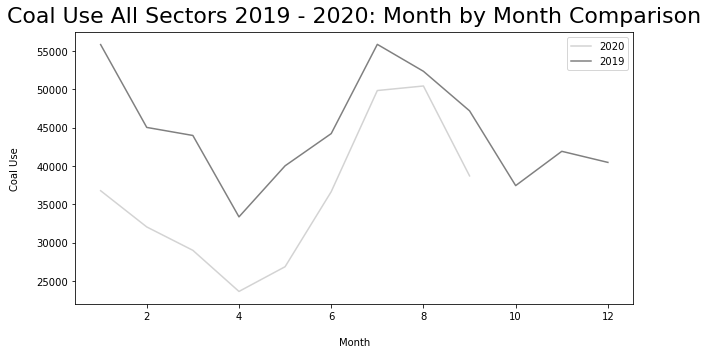

In [101]:
coal_pivot.plot(kind='line', figsize=(10, 5), color=['lightgray', 'gray', 'black'], rot=0)                                       
plt.title("Coal Use All Sectors 2019 - 2020: Month by Month Comparison", y=1.013, fontsize=22)
plt.xlabel("Month", labelpad=16)
plt.ylabel("Coal Use", labelpad=16); 

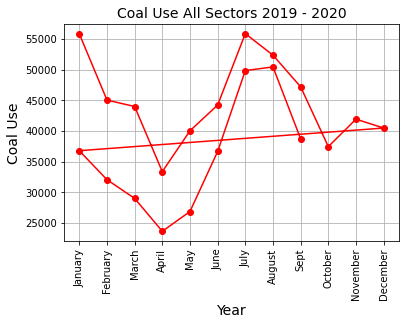

In [83]:
plt.plot(coal['month'], coal['all_sectors'], color='red', marker='o')
plt.title('Coal Use All Sectors 2019 - 2020', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation = 90);
plt.ylabel('Coal Use', fontsize=14)
plt.grid(True)
plt.show()

#### --NATURAL GAS

In [54]:
natural_gas = pd.read_csv('data/energy_consumption/natural_gas_clean.csv')
natural_gas.head()

,year,month,type,all_sectors,electric_utilities,ind_power_producers,commercial_sector,industrial_sector
0,2019,January,natural gas,873247,441597,373529,4566,53555
1,2019,February,natural gas,801042,411828,338638,4217,46359
2,2019,March,natural gas,835654,431525,350686,4516,48926
3,2019,April,natural gas,762539,398908,313343,4173,46115
4,2019,May,natural gas,863102,458692,350386,4217,49806


In [55]:
natural_gas.tail()

,year,month,type,all_sectors,electric_utilities,ind_power_producers,commercial_sector,industrial_sector
16,2020,May,natural gas,853523,456172,346972,3804,46574
17,2020,June,natural gas,1067619,556783,457006,4249,49581
18,2020,July,natural gas,1396437,715032,623770,5046,52588
19,2020,August,natural gas,1304306,665469,580958,4980,52899
20,2020,Sept,natural gas,1058029,536040,469587,4484,47918


##### Average Natural Gas Consumption 2019-2020

In [56]:
natural_gas.groupby('year')['all_sectors'].mean()

year
2019    9.667132e+05
2020    1.024988e+06
Name: all_sectors, dtype: float64

#### --PETROLIUM LIQUIDS

In [57]:
petro_liquids = pd.read_csv('data/energy_consumption/petro_liquid_clean.csv')
petro_liquids.head()

,year,month,type,all_sectors,electric_utilities,ind_power_producers,commercial_sector,industrial_sector
0,2019,January,petro liquids,2506,1672,755,32,46
1,2019,February,petro liquids,1482,1099,327,15,42
2,2019,March,petro liquids,1476,1159,263,16,38
3,2019,April,petro liquids,1417,1046,313,15,44
4,2019,May,petro liquids,1702,1305,346,17,33


In [58]:
petro_liquids.tail()

,year,month,type,all_sectors,electric_utilities,ind_power_producers,commercial_sector,industrial_sector
16,2020,May,petro liquids,1288,1010,227,20,31
17,2020,June,petro liquids,1569,1232,287,20,30
18,2020,July,petro liquids,1747,1343,348,25,31
19,2020,August,petro liquids,1674,1316,311,24,23
20,2020,Sept,petro liquids,1411,1129,233,23,27


##### Average Petroleum Liquids Consumption 2019-2020

In [59]:
petro_liquids.groupby('year')['all_sectors'].mean()

year
2019    1736.333333
2020    1496.000000
Name: all_sectors, dtype: float64

#### --PETROLIUM COKE

In [60]:
petro_coke = pd.read_csv('data/energy_consumption/petro_coke_clean.csv')
petro_coke.head()

,year,month,type,all_sectors,electric_utilities,ind_power_producers,commercial_sector,industrial_sector
0,2019,January,petro coke,326,258,54,0,13
1,2019,February,petro coke,272,222,39,0,11
2,2019,March,petro coke,235,193,28,0,13
3,2019,April,petro coke,155,107,32,0,16
4,2019,May,petro coke,294,219,60,0,14


In [61]:
petro_coke.tail()

,year,month,type,all_sectors,electric_utilities,ind_power_producers,commercial_sector,industrial_sector
16,2020,May,petro coke,231,183,35,0,13
17,2020,June,petro coke,308,258,36,0,14
18,2020,July,petro coke,356,298,43,0,15
19,2020,August,petro coke,305,245,44,0,16
20,2020,Sept,petro coke,159,116,31,0,13


##### Average Petroleum Coke Consumption 2019-2020

In [62]:
petro_coke.groupby('year')['all_sectors'].mean()

year
2019    226.916667
2020    254.777778
Name: all_sectors, dtype: float64

## 2. Reading in 'Transportation Trends' Data

#### --TSA 

In [63]:
tsa = pd.read_csv('data/transportation/tsa/TSA_traveler_throughput.csv')
tsa.head()

,date,throughput,year
0,12/10/2020,754307,2020
1,12/9/2020,564372,2020
2,12/8/2020,501513,2020
3,12/7/2020,703546,2020
4,12/6/2020,837137,2020


In [39]:
tsa.tail()

,date,throughput,year
565,3/5/2019,2402692,2019
566,3/4/2019,2143619,2019
567,3/3/2019,1979558,2019
568,3/2/2019,2257920,2019
569,3/1/2019,2301439,2019


##### Average TSA Throughput 2019-2020

In [64]:
tsa.groupby('year')['throughput'].mean()

year
2019    2.375639e+06
2020    6.387919e+05
Name: throughput, dtype: float64

#### --Airline Traffic 

In [40]:
airlines = pd.read_csv('data/transportation/airlines/air_traffic.csv')
airlines.head()

,month,2017,2018,2019,2020
0,January,62.62,64.43,67.02,70.76
1,February,58.38,61.72,63.58,67.81
2,March,72.96,76.29,80.21,39.06
3,April,70.26,73.63,76.43,3.01
4,May,73.68,77.30,81.35,8.43


In [41]:
airlines.tail()

,month,2017,2018,2019,2020
7,August,77.10,80.99,83.78,NaN
8,September,64.92,68.70,72.59,NaN
9,October,72.70,75.51,78.62,NaN
10,November,69.63,72.74,73.07,NaN
11,December,70.33,72.88,79.30,NaN


##### Average Airline Miles Traveled 2017-2020

In [66]:
print('Average amount of airline miles (2017): ', airlines['2017'].mean())

Average amount of airline miles (2017):  70.78416666666668


In [67]:
print('Average amount of airline miles (2018): ', airlines['2018'].mean())

Average amount of airline miles (2018):  74.08583333333334


In [68]:
print('Average amount of airline miles (2019): ', airlines['2019'].mean())

Average amount of airline miles (2019):  77.22916666666667


In [69]:
print('Average amount of airline miles (2020): ', airlines['2020'].mean())

Average amount of airline miles (2020):  34.26


#### --Airline Fuel Consumption

In [42]:
airline_fuel = pd.read_csv('data/transportation/airlines/airlines_fuel_clean.csv')
airline_fuel.head()

,year,month,dom_consumption,dom_cost,dom_cost_per_gallon,int_consumption,int_cost,int_cost_per_gallon,total_consumption,total_cost,total_cost_per_gallon
0,2000,January,1108.6,766.5,0.69,386.8,313.6,0.81,1495.4,1080.1,0.72
1,2000,February,1068.4,772.3,0.72,366.8,298.7,0.81,1435.2,1071.1,0.75
2,2000,March,1174.3,875.5,0.75,399.7,330.1,0.83,1574.0,1205.6,0.77
3,2000,April,1145.3,841.9,0.74,407.9,336.7,0.83,1553.1,1178.7,0.76
4,2000,May,1174.2,833.3,0.71,434.4,337.9,0.78,1608.6,1171.2,0.73


In [43]:
airline_fuel.tail()

,year,month,dom_consumption,dom_cost,dom_cost_per_gallon,int_consumption,int_cost,int_cost_per_gallon,total_consumption,total_cost,total_cost_per_gallon
245,2020,June,393.5,442.9,1.13,164.4,161.0,0.98,558.0,603.9,1.08
246,2020,July,565.7,666.1,1.18,197.4,228.8,1.16,763.1,894.8,1.17
247,2020,August,589.0,713.8,1.21,212.5,254.6,1.20,801.4,968.4,1.21
248,2020,September,508.4,598.8,1.18,219.4,253.3,1.15,727.8,852.1,1.17
249,2020,October,568.9,650.5,1.14,238.5,267.0,1.12,807.4,917.5,1.14


##### Average Airline Fuel Consumption 2000-2020

In [72]:
airline_fuel.groupby('year')['dom_consumption'].mean()

year
2000    1158.658333
2001    1092.666667
2002    1023.933333
2003    1034.750000
2004    1114.991667
2005    1107.016667
2006    1084.941667
2007    1083.250000
2008    1039.125000
2009     928.966667
2010     921.400000
2011     902.341667
2012     853.175000
2013     846.358333
2014     857.733333
2015     895.116667
2016     930.608333
2017     945.033333
2018     987.333333
2019    1015.341667
2020     599.200000
Name: dom_consumption, dtype: float64

#### --Urban and Rural Miles Traveled

In [44]:
rural_miles = pd.read_csv('data/transportation/traffic/rural_miles_traveled.csv')
rural_miles.head()

,month,year,system,miles_traveled
0,Jan,2019,Rural Interstate,18693
1,Feb,2019,Rural Interstate,16849
2,Mar,2019,Rural Interstate,20917
3,Q1,2019,Rural Interstate,56460
4,Jan,2019,Rural Arterial,27596


In [45]:
rural_miles.tail()

,month,year,system,miles_traveled
135,Q3,2020,Total Rural,247522
136,Jul,2020,All Systems,262461
137,Aug,2020,All Systems,251183
138,Sep,2020,All Systems,248277
139,Q3,2020,All Systems,761922


##### Average Rural Miles Traveled 2019-2020

In [74]:
rural_miles.groupby('year')['miles_traveled'].mean()

year
2019    131140.362500
2020    113283.533333
Name: miles_traveled, dtype: float64

In [75]:
urban_miles = pd.read_csv('data/transportation/traffic/urban_miles_traveled.csv')
urban_miles.head()

,month,year,system,miles_traveled
0,Jan,2019,Urban Interstate,43946
1,Feb,2019,Urban Interstate,39812
2,Mar,2019,Urban Interstate,48101
3,Q1,2019,Urban Interstate,131859
4,Jan,2019,Urban Arterial,90386


In [76]:
urban_miles.tail()

,month,year,system,miles_traveled
135,Q3,2020,Total Urban,514400
136,Jul,2020,All Systems,262461
137,Aug,2020,All Systems,251183
138,Sep,2020,All Systems,248277
139,Q3,2020,All Systems,761922


##### Average Urban Miles Traveled 2019-2020

In [78]:
urban_miles.groupby('year')['miles_traveled'].mean()

year
2019    195571.300000
2020    165792.566667
Name: miles_traveled, dtype: float64

## 3. Reading in 'Manufacturing Trends' Data

In [48]:
shipments_orders = pd.read_csv('data/manufacturing/manufacturing_trends.csv')
shipments_orders.head()

,Industry,Type,Value,Year
0,All manufacturing industries,Shipments,4702406,2020
1,Construction materials and supplies,Shipments,521154,2020
2,Information technology,Shipments,242603,2020
3,Computers and related products,Shipments,17633,2020
4,Motor vehicle and parts,Shipments,522425,2020


In [49]:
shipments_orders.tail()

,Industry,Type,Value,Year
43,Excluding aircraft,New Orders,661265,2019
44,Defense capital goods,New Orders,121808,2019
45,Consumer goods,New Orders,2126392,2019
46,Consumer durable goods,New Orders,431807,2019
47,Consumer nondurable goods,New Orders,1694585,2019


In [ ]:
##### Average New Orders and Shipments 2019-2020

In [79]:
shipments_orders.groupby('Year')['Value'].mean()

Year
2019    1.082861e+06
2020    9.990233e+05
Name: Value, dtype: float64